In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playtennis/PlayTennis.csv


In [2]:
tennis_Data=pd.read_csv('/kaggle/input/playtennis/PlayTennis.csv')
tennis_Data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
tennis_Data.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [4]:
tennis_Data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [5]:

# Assuming tennis_Data is your DataFrame
columns_to_label_encode = ['outlook', 'temp', 'humidity','windy', 'play']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store encoding information
encoding_info = {}
tennis_DataEncoded= tennis_Data.copy()

# Label encode selected columns and update the dictionary
for column in columns_to_label_encode:
    new_column_name = f"{column}_encoded"
    tennis_DataEncoded[new_column_name] = label_encoder.fit_transform(tennis_DataEncoded[column])
    
    # Update the dictionary
    encoding_info[column] = {
        'original_column': column,
        'encoded_column': new_column_name,
        'label_encoder': label_encoder.classes_.tolist()
    }

In [6]:
tennis_Data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [7]:
tennis_DataEncoded.head()

,outlook,temp,humidity,windy,play,outlook_encoded,temp_encoded,humidity_encoded,windy_encoded,play_encoded
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1


<Axes: xlabel='temp', ylabel='humidity'>

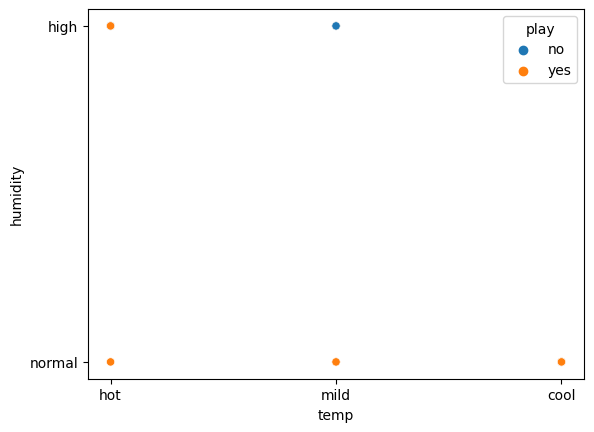

In [8]:
sns.scatterplot(x='temp', y='humidity', hue='play', data=tennis_DataEncoded)

In [9]:

# sns.kdeplot(x='temp_encoded', y='humidity_encoded', hue='play',data=tennis_DataEncoded)
# plt.yticks(ticks=range(len(humidity_labels)), labels=humidity_labels)
# plt.xticks(ticks=range(len(temp_labels)), labels=temp_labels)
# plt.ylabel('Humidity')

# plt.xlabel('Temperature')

# # Set a title for the figure
# plt.title('Tennis Decision Factors')


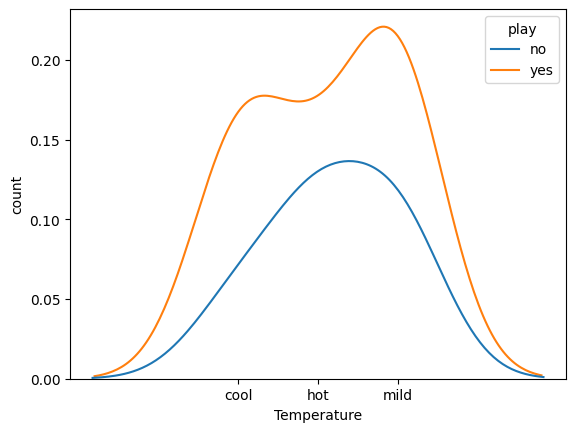

In [10]:
temp_labels = encoding_info['temp']['label_encoder']
sns.kdeplot(x='temp_encoded', hue='play', data=tennis_DataEncoded)

# Set x-labels using the dictionary values
plt.xticks(ticks=range(len(temp_labels)), labels=temp_labels)
plt.xlabel('Temperature')
plt.ylabel('count')
plt.show()

In [11]:
tennis_DataEncoded.head()

,outlook,temp,humidity,windy,play,outlook_encoded,temp_encoded,humidity_encoded,windy_encoded,play_encoded
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1


/tmp/ipykernel_42/2507419325.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='humidity_encoded',shade=True,hue='play', data=tennis_DataEncoded)


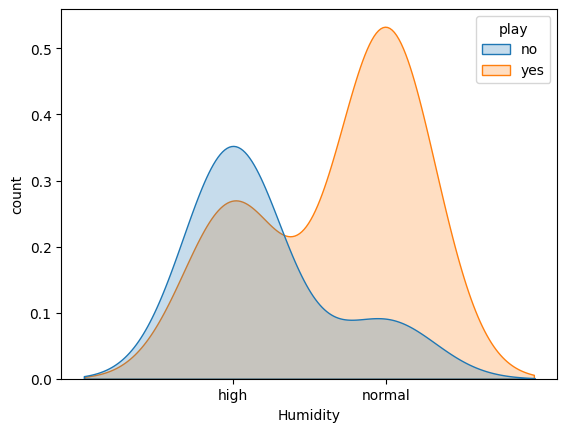

In [12]:
humidity_labels = encoding_info['humidity']['label_encoder']
sns.kdeplot(x='humidity_encoded',shade=True,hue='play', data=tennis_DataEncoded)

# Set x-labels using the dictionary values
plt.xticks(ticks=range(len(humidity_labels)), labels=humidity_labels)
plt.xlabel('Humidity')
plt.ylabel('count')
plt.show()

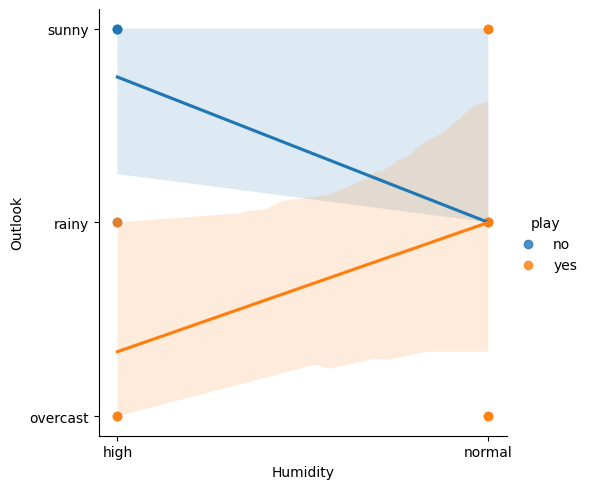

In [13]:

outlook_labels = encoding_info['outlook']['label_encoder']
play_labels = encoding_info['play']['label_encoder']

sns.lmplot(y='outlook_encoded',x='humidity_encoded',hue='play', data=tennis_DataEncoded)

plt.xticks(ticks=range(len(humidity_labels)), labels=humidity_labels)
# Set x-labels using the dictionary values
# plt.yticks(ticks=range(len(play_labels)), labels=play_labels)
plt.yticks(ticks=range(len(outlook_labels)), labels=outlook_labels)
plt.ylabel('Outlook')
plt.xlabel('Humidity')
plt.show()

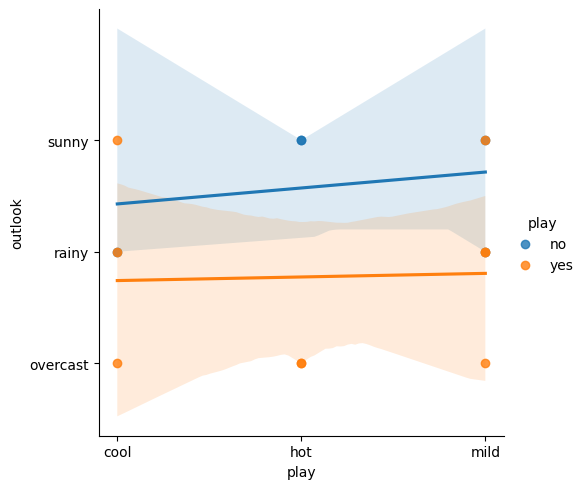

In [14]:

outlook_labels = encoding_info['outlook']['label_encoder']
play_labels = encoding_info['outlook']['label_encoder']
sns.lmplot(y='outlook_encoded',x='temp_encoded',hue='play', data=tennis_DataEncoded)

# Set x-labels using the dictionary values
plt.xticks(ticks=range(len(temp_labels)), labels=temp_labels)
plt.yticks(ticks=range(len(outlook_labels)), labels=outlook_labels)
plt.ylabel('outlook')
plt.xlabel('play')
plt.show()

/tmp/ipykernel_42/284283970.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='outlook_encoded',shade=True,hue='play', data=tennis_DataEncoded)


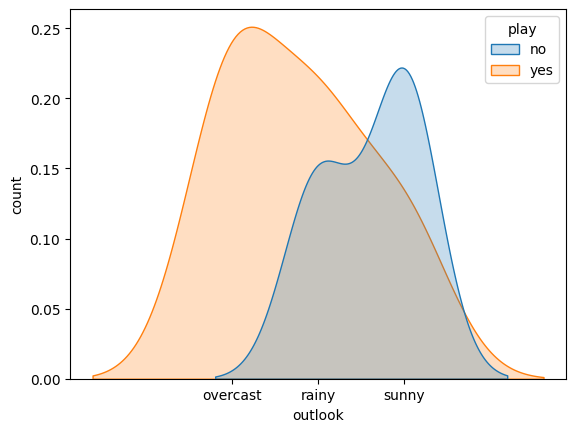

In [15]:
outlook_labels = encoding_info['outlook']['label_encoder']
sns.kdeplot(x='outlook_encoded',shade=True,hue='play', data=tennis_DataEncoded)

# Set x-labels using the dictionary values
plt.xticks(ticks=range(len(outlook_labels)), labels=outlook_labels)
plt.xlabel('outlook')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Tennis Decision Factors')

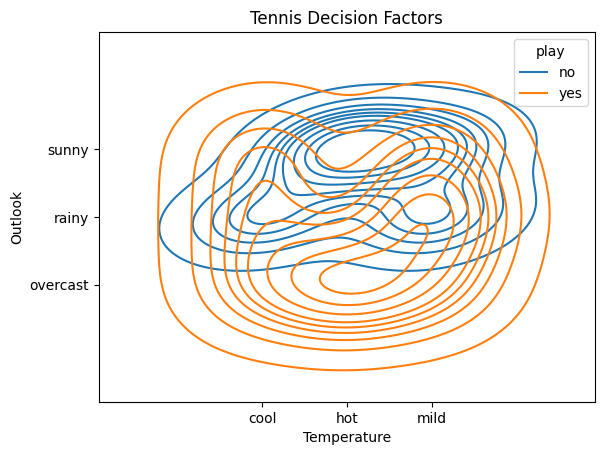

In [16]:


sns.kdeplot(x='temp_encoded', y='outlook_encoded', hue='play',data=tennis_DataEncoded)
plt.yticks(ticks=range(len(outlook_labels)), labels=outlook_labels)
plt.xticks(ticks=range(len(temp_labels)), labels=temp_labels)
plt.ylabel('Outlook')

plt.xlabel('Temperature')

# Set a title for the figure
plt.title('Tennis Decision Factors')

# ML part :  Decision Tree Classifier pipline

In [17]:
# Extract features (X) and target variab`le (y)
X = tennis_Data.drop('play', axis=1)
y = tennis_Data['play']

#preprocessing steps within a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), ['outlook', 'temp', 'humidity', 'windy']),

    ],
    remainder='passthrough'
)

# the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[5 0]
 [0 9]]


In [18]:
y_pred

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [ ]:
preprocessor

In [25]:
X.columns

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object')

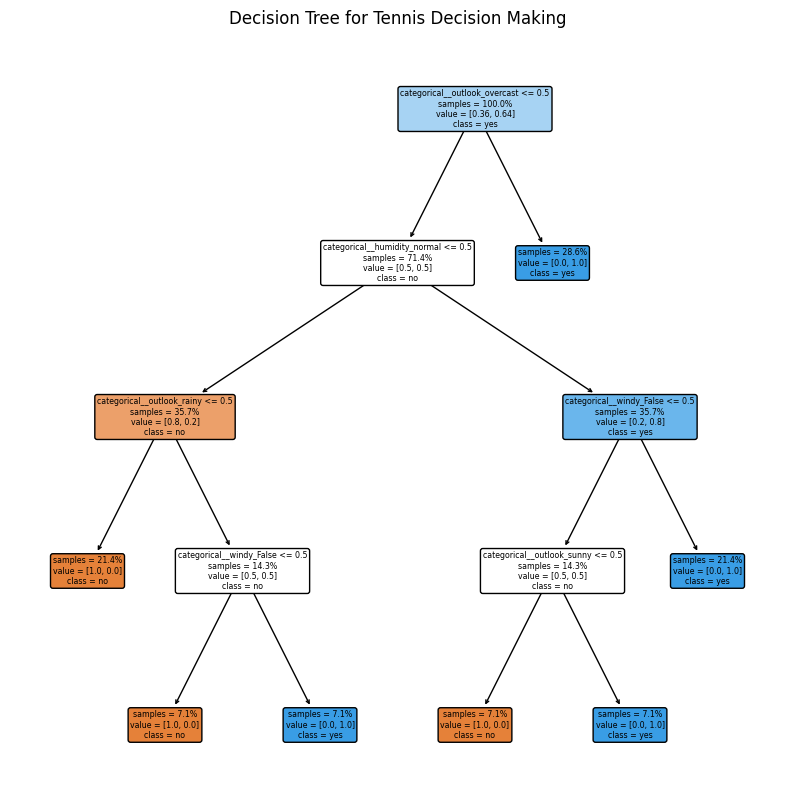

In [19]:
plt.figure(figsize=(10, 10))
plot_tree(pipeline.named_steps['classifier'], 
          feature_names=preprocessor.get_feature_names_out(X.columns),
          class_names=encoding_info['play']['label_encoder'],
          filled=True,
          rounded=True,
          impurity=False,  # Set impurity to False for a cleaner plot
          proportion=True,  # Show proportions instead of counts
          precision=2  # Set precision for proportion display
         )

plt.title("Decision Tree for Tennis Decision Making")
plt.show()

In [20]:
predicted_label = pipeline.predict(pd.DataFrame({
    'outlook': ['rainy'],
    'temp': ['mild'],
    'humidity': ['high'],
    'windy': [True]
}))
print("answer:", predicted_label)


answer: ['no']


In [21]:

predicted_label = pipeline.predict(
    pd.DataFrame({
    'outlook': ['sunny'],
    'temp': ['cool'],
    'humidity': ['normal'],
    'windy': [False]
})
     )
print("answer:", predicted_label)


answer: ['yes']


In [22]:
tennis_Data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [24]:
import joblib
joblib.dump(pipeline, 'your_pipeline.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']